Create Fast Henry .inp

In [1]:
import numpy as np

def gen_nodes_2d(h,g,w,d):
    r=0.1
    g_ = g+w
    l  = 0.5 *(np.pi*d-g_)
    
    #calculate nodes one coil
    assert w<g_ and 2*w<l and w<h
    
    nodes = [
        [g_,r*h],
        [g_,0],
        [l,0],
        [l,h],
        [0,h],
        [0,0],
        [-l,0],
        [-l,h],
        [-g_,h],
        [-g_,r*h]
    ]
    #return nodes
    #add extra horixontal nodes to replicate curves in 3d space
    n=20 #number of segments in 
    atbi =[]
    
    for i,[x,y] in enumerate(nodes[:-1]):
        if i%2==1:
            dx = (nodes[i+1][0]-x)/n
            atbi.append([[x+(num)*dx,y] for num in np.arange(1,n)])
    
    atbi = [x for _ in atbi for x in _]
    q = len(atbi)//4
    
    prod = [
            nodes[0:2],atbi[0:q],
            nodes[2:4],atbi[q:2*q],
            nodes[4:6],atbi[2*q:3*q],
            nodes[6:8],atbi[3*q:],
            nodes[8:10]
                 ]
    prod = [x for _ in prod for x in _]
    return prod

def proj2dto3d(nodes,d):
    r =d/2
    return [ [r*np.cos(x/r),r*np.sin(x/r),y] for [x,y] in nodes]


#parameters /mm
h = 5 #height
g = 1 #actual gap between coils
w = 1 #width of coil
d = 5 #diameter of epr tube ie diameter of coil

nodes = gen_nodes_2d(h,g,w,d)
nodes = proj2dto3d(nodes,d)


Generate .inp file

In [16]:
#nodes
script = "\n".join( [f"N{i+1} x={x} y={y} z={z}" for i, [x,y,z] in enumerate(nodes)] )

#Break up the string
script = script +"\n\n"

#segments
script = script + "\n".join( [f"E{i+1} N{i+1} N{i+2} w={w} h={h}" for i,[x,y,z] in enumerate(nodes[:-1])] )

script = """
.units mm
.Default sigma=5.80e4 \n
""" + script + """\n
.external N1 N{:}
.freq fmin=10e6 fmax=20e6 ndec=0.05

.end""".format(len(nodes))


with open('test.inp', 'w') as f:
    f.write(script)

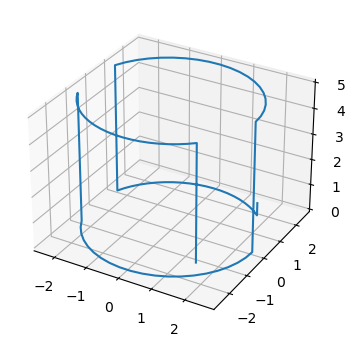

In [7]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = nodes
x,y,z = [node[0] for node in nodes] , [node[1] for node in nodes] ,[node[2] for node in nodes]
ax.plot(x, y, z)
plt.show()

In [8]:
print(script)

N1 x=1.7417667733679139 y=1.793390227248807 z=0.5
N2 x=1.7417667733679139 y=1.793390227248807 z=0
N3 x=1.559737291536666 y=1.9537706061331424 z=0
N4 x=1.3630196767382188 y=2.095752218375169 z=0
N5 x=1.1534664297102464 y=2.2179980152226237 z=0
N6 x=0.9330509250542007 y=2.319356801196293 z=0
N7 x=0.7038488278567518 y=2.398874074961976 z=0
N8 x=0.46801854703603263 y=2.4558010179227225 z=0
N9 x=0.22778090948461158 y=2.4896015458852774 z=0
N10 x=-0.014601753581076288 y=2.499957357394793 z=0
N11 x=-0.2568469111198296 y=2.4867709311973636 z=0
N12 x=-0.49667332698765276 y=2.450166444603104 z=0
N13 x=-0.7318225424656155 y=2.390488604101505 z=0
N14 x=-0.9600801442914231 y=2.3082993992412164 z=0
N15 x=-1.1792966179124755 y=2.204372810343159 z=0
N16 x=-1.3874075895841567 y=2.0796875198847253 z=0
N17 x=-1.5824532666923952 y=1.9354176961923666 z=0
N18 x=-1.7625968932298877 y=1.77292193623305 z=0
N19 x=-1.926142046629749 y=1.5937304716309346 z=0
N20 x=-2.0715486130713296 y=1.3995307583909156 z=0
N21 

In [10]:
len(nodes)

86